In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -m spacy download pt_core_news_sm


     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     --------------------------------------- 0.0/13.0 MB 222.6 kB/s eta 0:00:59
     --------------------------------------- 0.0/13.0 MB 262.6 kB/s eta 0:00:50
     --------------------------------------- 0.1/13.0 MB 459.5 kB/s eta 0:00:29
      -------------------------------------- 0.2/13.0 MB 908.0 kB/s eta 0:00:15
     - -------------------------------------- 0.4/13.0 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.6/13.0 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/13.0 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/13.0 MB 2.9 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/13.0 MB 2.9 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/13.0 MB 3.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/13.0 MB 3.3 

In [5]:
#import libres from tokenized, removing stowords, stemming and lemmatization
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import RSLPStemmer
nltk.download('rslp')
import spacy
import matplotlib.pyplot as plt


def filter_data_event(data, evento=0):
  '''
  This function selecte the deliberations correspnding one each event type 
      0: INTERPET
      1: ENEPET
      2: ENAPET
  '''
  list_events = ['InterPET', 'ENEPET', 'ENAPET']
  event = list_events[evento]
  evento_df = data[data['evento'].str.contains(event)]

  return evento_df

# Functions for pré-processing

def tokenizing(data):
  #data: series with texts
  return data.apply(lambda x: word_tokenize(x))

def removed_ponctuation(data_tokenized):
  #data: series with texts tokenized
  return data_tokenized.apply(lambda x: [word for word in x if word.isalpha()])
  
def removed_stopwords(data_tokenized):
  #data: series with texts tokenized
  stop_words = set(stopwords.words('portuguese'))
  return data_tokenized.apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

def stemming(data_tokenized):
  #data: series with texts tokenized
  stemmer = RSLPStemmer()
  return data_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])

def lemmatizing(data_tokenized):
  #data: series with texts tokenized

  #load model from linguage portuguese
  nlp = spacy.load('pt_core_news_sm')

  #Realizing lematizing in words
  return data_tokenized.apply(lambda x: [token.lemma_ for token in nlp(' '.join(x))])

def pre_processing(data):
  #Realizing pré-processing
  data['tokenized'] = tokenizing(data.descricao)
  data['removed_ponctuation'] = removed_ponctuation(data['tokenized'])
  data['removed_stopwords'] = removed_stopwords(data['removed_ponctuation'])
  data['stemming'] = stemming(data['removed_stopwords'])
  data['lemmatizing'] = lemmatizing(data['removed_stopwords'])

  return data


#Functions for calculating frequences of words and visualizing

def freq_words(data):
  ''' data: data series with tokens '''
  
  #Converting for Text object all deliberations and calculating frequence absolute the words
  deliberacoes_lematizing_text = nltk.Text([word for deliberacao in data for word in deliberacao])
  freq_plot = nltk.FreqDist(deliberacoes_lematizing_text)
  
  #Creating dataframe for save words and frequences
  df_freq = pd.DataFrame()
  df_freq['word'] = list(word for word, freq in freq_plot.items())
  df_freq['freq'] = list(freq for word, freq in freq_plot.items())

  #Organizing in descending order
  df_freq.sort_values(by='freq', ascending=False, inplace=True)

  return df_freq

def plot_freq_words(data, qtd):
  ''' data: dataframe with words and frequence in descending order
      qtd: quantity of words more often '''

  plt.bar(data.word[:qtd], data.freq[:qtd]) 
  plt.title(str(qtd) + ' palavras mais frequentes', fontsize=15, fontweight='bold')
  plt.xlabel('Palavras', fontweight='bold')
  plt.ylabel('Frequência', fontweight='bold')
  plt.xticks(rotation='vertical')
  plt.show()


## 1.0 - Pré-processamento 
- Tokenização
- Remoção de StopWords
- Remoção de pontuações
- Stemming
- Lemmatization

In [ ]:
#Reading dataset 
deliberacoes = pd.read_csv(r'C:\Users\Ari\Documents\UFAL\PET C&T\Pesquisas\NLP\dados.csv', sep=',')

#Realizing pré-processing
deliberacoes_processing = pre_processing(deliberacoes)
deliberacoes_processing.head()

NameError: name 'pd' is not defined

In [211]:
deliberacoes_processing.removed_stopwords.apply(lambda x: nltk.FreqDist(x))

0      {'diretoria': 1, 'CENAPET': 1, 'conjunto': 1, ...
1      {'titulares': 1, 'suplentes': 1, 'Conselho': 1...
2      {'diretoria': 1, 'CENAPET': 1, 'intervenha': 1...
3      {'Diretoria': 1, 'CENAPET': 1, 'pressione': 1,...
4      {'Diretoria': 1, 'CENAPET': 1, 'proponha': 1, ...
                             ...                        
328    {'petianos': 1, 'discentes': 1, 'juntamente': ...
329    {'grupos': 1, 'PET': 1, 'incluam': 1, 'ativida...
330    {'Sugerimos': 1, 'grupos': 5, 'PET': 2, 'criem...
331    {'Sugerimos': 1, 'grupos': 1, 'PET': 1, 'dentr...
332    {'grupos': 2, 'PET': 1, 'promovam': 1, 'rotine...
Name: removed_stopwords, Length: 333, dtype: object

## 2.0 - Visualizando frequências de palavras

### 2.1 - Sem pontuação, sem StopWords e após lemmatization

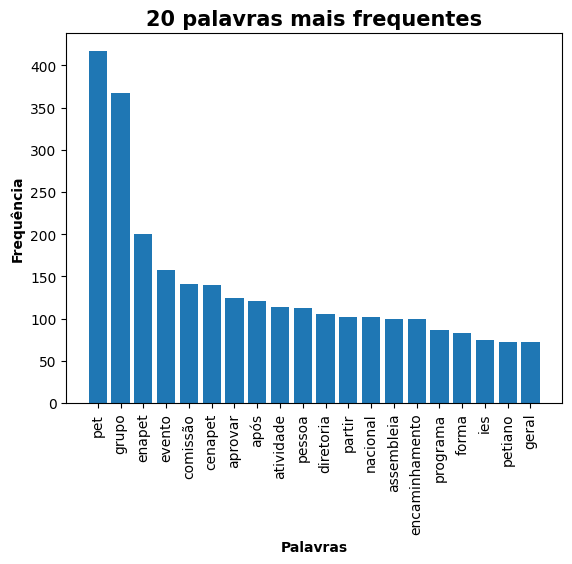

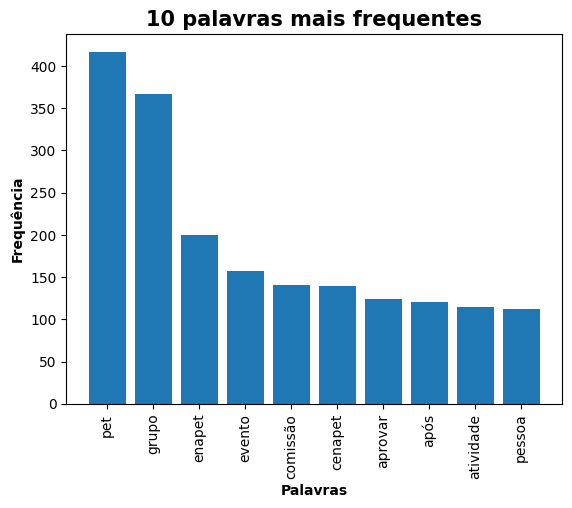

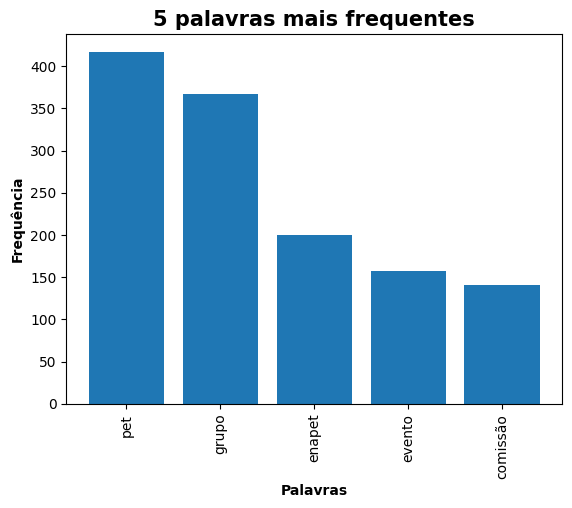

In [325]:
#calculate frequence absolute the words
freq_lemmatizing = freq_words(deliberacoes_processing.lemmatizing)

#Visualizing 20, 10 and 5 words of more frequence
plot_freq_words(freq_lemmatizing, 20)
plot_freq_words(freq_lemmatizing, 10)
plot_freq_words(freq_lemmatizing, 5)

In [326]:
#Junatando todos os "lemas" em um texto único
deliberacoes_lematizing_text = nltk.Text([word for deliberacao in deliberacoes_processing.lemmatizing for word in deliberacao])


## Bag of Words

In [301]:
text = ['Que a diretoria PET', 'Que o PET PET'] 

#create the transform
vectorizer = CountVectorizer(analyzer = 'word')

# tokenize and build vocab
vocab = vectorizer.fit(text)

test = vectorizer.fit_transform(text)

test.toarray()

array([[1, 1, 1],
       [0, 2, 1]], dtype=int64)

In [515]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def medidor_de_similaridade(text1, text2):

  to_vect = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))
  result = []
  for comentario1 in text1:
    for comentario2 in text2:
      x1, x2 = to_vect.fit_transform([comentario1, comentario2])
      t1, t2 = x1.toarray(), x2.toarray()

      min = np.amin([t1, t2], axis = 0)
      sum = np.sum(min)
      count = np.sum([t1, t2][0])
      to_mean = sum/count
      result.append(to_mean)

  return result

#Faz pré-processamento de um texto digitado
def precessing_text_input(text):
    texto = pd.DataFrame()
    texto['descricao'] = [text]

    texto = pre_processing(texto)
    texto['lemma_text'] = (texto.lemmatizing.apply(lambda x: ' '.join(x))).to_list()

    return texto.lemma_text[0]

#Compara o texto
def similar(df_delibe, text):

    #Gerando uma cópia do dataframe original e armazenando texto de entrada
    df_new = df_delibe.copy()
    text1 = [text]

    text2 = df_new.lemma_text.to_list()

    #Realizando comparação
    df_new['similar'] = medidor_de_similaridade(text1, text2)

    return df_new



In [523]:
nova_deliberacao = 'Que a comissão de comunicação do ENEPET promova divulgações (podendo ser antes ou durante o evento) por meio de vídeos e postagens que apresentem o PET UFAL para os grupos do Nordeste, demonstrando nossa História, formas de organização, atuação, normativas, resgatando assim a essência e importância dos eventos presenciais.'

#Cópia do dataframe com os dados
df = deliberacoes.copy()

#Acrescentando textos lemmatizados
df['lemma_text'] = (deliberacoes_processing.lemmatizing.apply(lambda x: ' '.join(x))).to_list()

#Selecionando uma deliberação
text_reference = precessing_text_input(nova_deliberacao)

#Procurando similaridade
df_similar = similar(df, text_reference)

df_similar[(df_similar.similar > 0.17)]


,id,evento,tematicas,responsaveis,descricao,lemma_text,similar
260,277,Carta GDP 07 - ENAPET 2020,deliberacoes.Tematica.None,deliberacoes.Responsavel.None,Acessibilidade Socioeconômica e de Pessoas com...,acessibilidade socioeconômico pessoa deficiênc...,0.186441


In [524]:
df_similar.descricao[260]

'Acessibilidade Socioeconômica e de Pessoas com Deficiência\r\n\r\nAOS GRUPOS PETs BRASIL,\r\nSobre acessibilidade socioeconômica e de pessoas com deficiencia\r\n\r\nQuando pautamos a acessibilidade, seja ela socioeconomica ou de pessoas com deficiencia ou surdas, deve-se atentar para que - além de buscar conhecimento sobre a temática para embasar nossas ações, as açoes de inclusão desses públicos sejam efetivas e acolhedoras. No XXV ENAPET, na ocasião do GDT 07 - Acessibilidade Socioeconômica e de Pessoas com Deficiência ou surdas, realizado nos dias 22 e 29 de novembro de 2020, os congressistas participantes discutiram sobre essa temática dentro da realidade dos grupos PET. Esta carta tem o objetivo de chamar a atenção do Programa de Educaçao Tutorial para o assunto a fim de sensibilizar o olhar para a importância de debater a acessibilidade e também de buscar maneiras para que a inclusão seja, de fato, efetiva. \r\n\r\nQuando falamos sobre acessibilidade de pessoas com deficiência o

### verificando se existe encaminhamento repetido na própria base de dados

In [518]:
#Cópia do dataframe com os dados
df = deliberacoes.copy()

#Acrescentando textos lemmatizados
df['lemma_text'] = (deliberacoes_processing.lemmatizing.apply(lambda x: ' '.join(x))).to_list()

for index in range(len(df)):
    #Selecionando uma deliberação
    text_reference = df.lemma_text.to_list()[index]

    #Procurando similaridade
    df_similar = similar(df, text_reference)

    df_similar[(df_similar.similar > 0.05) & (df_similar.similar != 1)]